In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/exercise.csv')

In [3]:
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [4]:
df.describe()

,Unnamed: 0,id,pulse
count,90.000000,90.000000,90.000000
mean,44.500000,15.500000,99.700000
std,26.124701,8.703932,14.858471
min,0.000000,1.000000,80.000000
25%,22.250000,8.000000,90.250000
50%,44.500000,15.500000,96.000000
75%,66.750000,23.000000,103.000000
max,89.000000,30.000000,150.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  90 non-null     int64 
 1   id          90 non-null     int64 
 2   diet        90 non-null     object
 3   pulse       90 non-null     int64 
 4   time        90 non-null     object
 5   kind        90 non-null     object
dtypes: int64(3), object(3)
memory usage: 4.3+ KB


In [6]:
df.isna().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [7]:
df.value_counts()

Unnamed: 0  id  diet     pulse  time    kind   
0           1   low fat  85     1 min   rest       1
67          23  low fat  105    15 min  running    1
65          22  low fat  112    30 min  running    1
64          22  low fat  104    15 min  running    1
63          22  low fat  98     1 min   running    1
                                                  ..
28          10  no fat   97     15 min  rest       1
27          10  no fat   100    1 min   rest       1
26          9   no fat   96     30 min  rest       1
25          9   no fat   99     15 min  rest       1
89          30  no fat   150    30 min  running    1
Name: count, Length: 90, dtype: int64

In [8]:
total_entries = len(df)
print("Total number of entries in the dataset:", total_entries)

Total number of entries in the dataset: 90


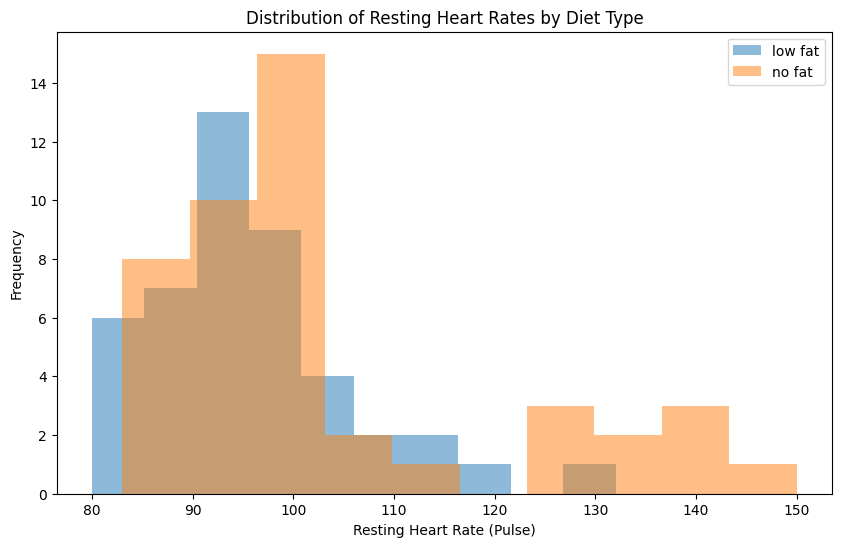

In [9]:
plt.figure(figsize=(10, 6))
df.groupby('diet')['pulse'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Resting Heart Rates by Diet Type')
plt.xlabel('Resting Heart Rate (Pulse)')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x600 with 0 Axes>

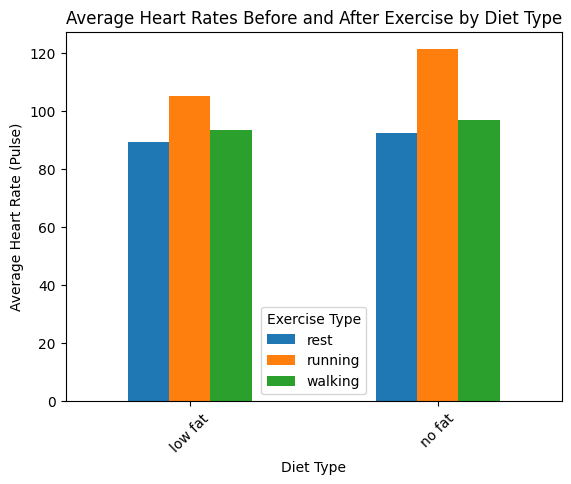

In [10]:
plt.figure(figsize=(10, 6))
df.groupby(['diet', 'kind'])['pulse'].mean().unstack().plot(kind='bar')
plt.title('Average Heart Rates Before and After Exercise by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Average Heart Rate (Pulse)')
plt.xticks(rotation=45)
plt.legend(title='Exercise Type')
plt.show()

In [11]:
average_hr_by_diet_kind = df.groupby(['diet', 'kind'])['pulse'].mean()
print("Average Heart Rate by Diet Type and Exercise Kind:")
print(average_hr_by_diet_kind)

Average Heart Rate by Diet Type and Exercise Kind:
diet     kind   
low fat  rest        89.333333
         running    105.066667
         walking     93.466667
no fat   rest        92.333333
         running    121.066667
         walking     96.933333
Name: pulse, dtype: float64


<Figure size 1000x600 with 0 Axes>

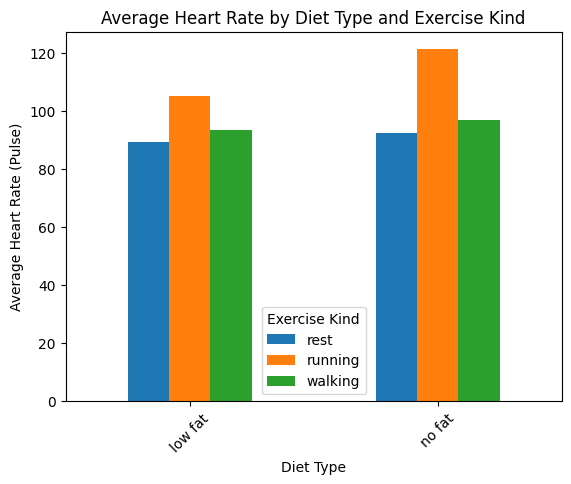

In [12]:
plt.figure(figsize=(10, 6))
df.groupby(['diet', 'kind'])['pulse'].mean().unstack().plot(kind='bar')
plt.title('Average Heart Rate by Diet Type and Exercise Kind')
plt.xlabel('Diet Type')
plt.ylabel('Average Heart Rate (Pulse)')
plt.xticks(rotation=45)
plt.legend(title='Exercise Kind')
plt.show()

In [13]:
max_hr_name = df.loc[df['pulse'].idxmax(), 'id']
min_hr_name = df.loc[df['pulse'].idxmin(), 'id']
print("Individual with the highest heart rate after exercise:", max_hr_name)
print("Individual with the lowest heart rate after exercise:", min_hr_name)

Individual with the highest heart rate after exercise: 30
Individual with the lowest heart rate after exercise: 4


<Figure size 1000x600 with 0 Axes>

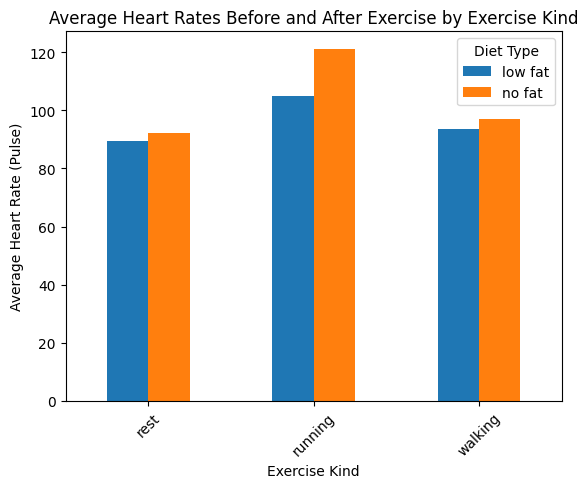

In [14]:
plt.figure(figsize=(10, 6))
df.groupby(['kind', 'diet'])['pulse'].mean().unstack().plot(kind='bar')
plt.title('Average Heart Rates Before and After Exercise by Exercise Kind')
plt.xlabel('Exercise Kind')
plt.ylabel('Average Heart Rate (Pulse)')
plt.xticks(rotation=45)
plt.legend(title='Diet Type')
plt.show()

In [15]:
median_hr_by_kind = df.groupby('kind')['pulse'].median()
print("Median Heart Rate by Exercise Kind:")
print(median_hr_by_kind)

Median Heart Rate by Exercise Kind:
kind
rest        91.5
running    110.0
walking     95.5
Name: pulse, dtype: float64


In [16]:
df['hr_difference'] = df.groupby('id')['pulse'].diff().fillna(0)
max_hr_diff_id = df.loc[df['hr_difference'].idxmax(), 'id']
min_hr_diff_id = df.loc[df['hr_difference'].idxmin(), 'id']
print("Individual with the highest heart rate difference:", max_hr_diff_id)
print("Individual with the lowest heart rate difference:", min_hr_diff_id)

Individual with the highest heart rate difference: 24
Individual with the lowest heart rate difference: 17


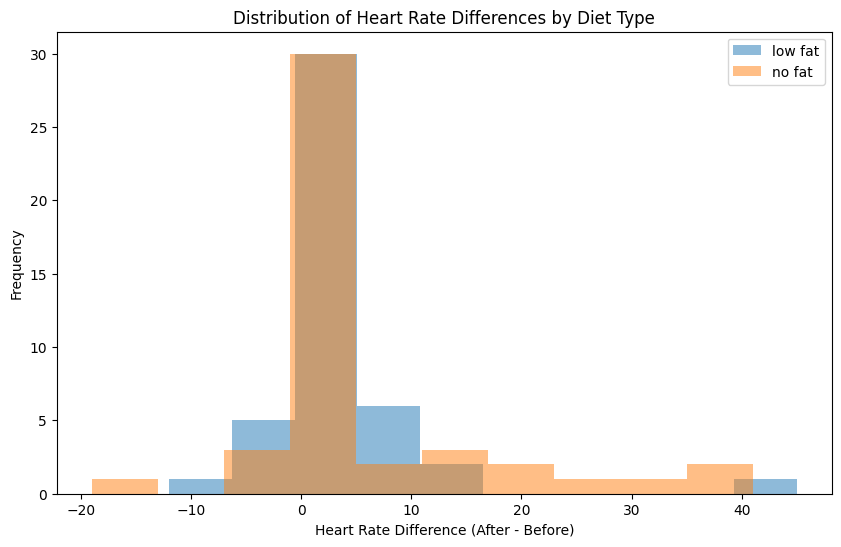

In [17]:
plt.figure(figsize=(10, 6))
df.groupby('diet')['hr_difference'].plot(kind='hist', alpha=0.5, legend=True)
plt.title('Distribution of Heart Rate Differences by Diet Type')
plt.xlabel('Heart Rate Difference (After - Before)')
plt.ylabel('Frequency')
plt.show()
